In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Opencv_master

/content/drive/MyDrive/Opencv_master


# La lecture des flux video

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('street.avi') # crèer un objet VideoCapture à partir d'un fichier

# cap = cv2.VideoCapture(0) # crèer un objet VideoCapture à partir d'une caméra

# Arrêt si l'objet est null
if (cap.isOpened()== False):
    print("Erreur dans la lecture du flux video")

# Lire jusqu'à la fin d'un fichier video ou sans fin pour la caméra
while(cap.isOpened()):

    # Capture frame par frame
    ret, frame = cap.read()
    if ret == True:

        # Afficher le frame
        cv2.imshow('Frame', frame)

        # Tappez 'q' pour arreter la lecture
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # sortir de la boucle
    else:
        break

#liberer l'objet VideoCapture
cap.release()

# Fermer tous les frames
cv2.destroyAllWindows()


# detection de mouvement

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('street.avi')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorMOG2()

while(True):
    ret, frame = cap.read()
    
    if not ret:
        break

    fgmask = fgbg.apply(frame)
    
    
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',fgmask)
    
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Face detection

## from image

In [ ]:
faces

array([[609,  86, 205, 205],
       [343,  84, 205, 205],
       [ 45,  81, 212, 212]], dtype=int32)

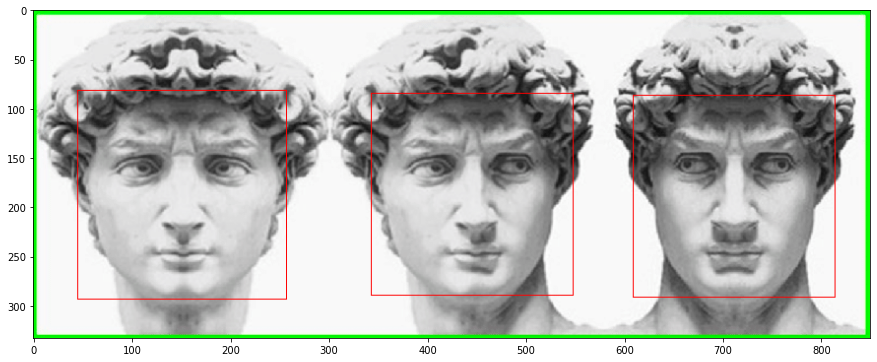

In [ ]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('face_detecte.xml')
# Read the input image
img = cv2.imread('multf.png')# img.jpg
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
# Display the output
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## From camera

In [ ]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('face_detecte.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

while True:
    # Read the frame
    _, img = cap.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display
    cv2.imshow('img', img)
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
# Release the VideoCapture object
cap.release()

Object `cv2.detectMultiScale` not found.
